<b><h3>Defining the Neural Network</h3></b>

In [1]:
import numpy as np
import scipy.special
import random
import matplotlib.pyplot
%matplotlib inline

# neural network class definition
# 3 layer neural network
class neuralNetwork:
    
    #initialize the neural network
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # set the number of nodes in each input, hidden and output layer
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        #setting the weights
        #get the same weights each time for testing purposes
        np.random.seed(42)
        
        # weights between input layer and the hidden layer
        self.wih = np.random.normal(0.0, pow(self.input_nodes, -0.5),(self.hidden_nodes, self.input_nodes))
        
        # weights between the hidden layer and the output layer
        self.who = np.random.normal(0.0, pow(self.hidden_nodes, -0.5),(self.output_nodes, self.hidden_nodes))
        
        #set the learning rate
        self.learning_rate = learning_rate
        
        # our activation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
        
    #train the neural network
    def train(self, inputs_list, targets_list):
        # convert inputs list to 2d array
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = np.dot(self.wih, inputs)

        #calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)

        # calculate signals into final output layer
        final_inputs = np.dot(self.who, hidden_outputs)
              
        # calculate signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
              
        # error is the (target - actual program output)
        node_errors = (targets - final_outputs) 
         
        # hidden layer error is the outputs_errors, split by the weights, recombined at the hidden nodes
        hidden_errors = np.dot(self.who.T, node_errors)
   
        #update the weights for the links between the hidden and output layers
        self.who += self.learning_rate * np.dot((node_errors * final_outputs * (1.0 - final_outputs)), np.transpose(hidden_outputs))
        self.wih += self.learning_rate * np.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), np.transpose(inputs))
        
    #query the neural network
    def query(self, inputs_list):
        # convert input list to 2d array
        inputs = np.array(inputs_list, ndmin=2).T
        
        # calculate the signals into hidden layer
        hidden_inputs = np.dot(self.wih, inputs)
        
        #calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = np.dot(self.who, hidden_outputs)
        
        # calculate signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs
    
    def get_wih(self):
        return self.wih
    
    def get_who(self):
        return self.who
    
    # Save the weights to a file
    def save_weights(self, wih_filename, who_filename):
        np.save(wih_filename, self.wih)
        np.save(who_filename, self.who)

    # Load weights from a file
    def load_weights(self, wih_filename, who_filename):
        self.wih = np.load(wih_filename)
        self.who = np.load(who_filename)
    
    def __repr__(self):
        return f"number of input nodes: {self.input_nodes}, number of hidden nodes: {self.hidden_nodes}, number of output nodes: {self.output_nodes}. learning rate: {self.learning_rate}."


In [2]:
# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 200
output_nodes = 10

# learning rate
learning_rate = 0.01

# create an instance of neural network
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

In [3]:
# first number in the list is the label (the actual label of the image)
# the subsequent 784 numbers (28x28 pixel image) are the 0-255 color values
# load the mnist training data CSV file into a list
training_data_file = open("mnist_train.csv", 'r')
training_data_list = training_data_file.readlines() #list of strings
training_data_file.close()

<b><h3>Training the Neural Network</h3></b>

In [4]:
# training data set of 60,000 records, and the test data set of 10,000 records. 
# train the neural network
epochs = 5

for e in range(epochs):
    # go through all records in the training data set
    for record in training_data_list:
        # split the record by the ',' commas
        all_values = record.split(',')
        # scale and shift the inputs
        inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # create the target output values (all 0.01, except the desired label which is 0.99)
        targets = np.zeros(output_nodes) + 0.01
        # all_values[0] is the target label for this record
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets) 

In [5]:
# load the mnist data CSV file into a list
test_data_file = open("mnist_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

<b><h3>Testing the Neural Network</h3></b>

In [6]:
# test the neural network
# scorecard for how well the network performs, initially empty
scorecard = []

# go through all the records in the test data set 
for record in test_data_list:
    # split the record by the ',' commans
    all_values = record.split(',')
    # the correct answer is the first vaklue
    correct_label = int(all_values[0])
    #print(f"correct label: {correct_label}")
    # scale and shift the inputs
    inputs = (np.asfarray(all_values[1:])/ 255.0 * .99) + 0.01
    # query the network
    outputs = n.query(inputs)
    # index with the highest value corresponds to the label
    label = np.argmax(outputs)
    #print(f"network's answer {label}")
    if (label == correct_label):
        scorecard.append(1)
    else: 
        scorecard.append(0)

In [7]:
# calculate the performance score, the fraction of correct answers
scorecard_array = np.asarray(scorecard)
print("performance =", scorecard_array.sum() / len(scorecard))

performance = 0.9539


In [8]:
print(n.get_wih())

[[ 0.01599991 -0.00667789  0.02139185 ... -0.04943075  0.01183861
   0.02006675]
 [ 0.02291382  0.04152061  0.03270424 ... -0.00712611  0.00531383
   0.0213477 ]
 [-0.05911842 -0.02220795  0.02505338 ... -0.01731367  0.03454166
   0.01872271]
 ...
 [-0.01805132 -0.02710683  0.0439468  ... -0.01413821 -0.02903203
   0.02516235]
 [ 0.05626083 -0.07133662 -0.01522897 ...  0.00837109  0.02280319
  -0.02540377]
 [-0.01576751 -0.02210506  0.03925871 ...  0.05392255  0.00636043
   0.04698166]]


In [9]:
print(n.get_who())

[[-0.10272608 -0.08230223 -0.90887733 ... -0.27667068  0.26148445
   0.0347101 ]
 [-0.09871707 -0.17534633  0.17500402 ... -0.13929758 -0.4015827
  -0.34943873]
 [-0.07599251  0.27584452 -0.49260233 ...  0.75086654  0.32984204
   0.34563114]
 ...
 [-0.13351136 -0.12016041  0.01188731 ... -0.54272977  0.13928291
  -0.15997738]
 [-0.00442076 -0.16443207  0.28179534 ...  0.49275226 -0.4976124
   0.48967571]
 [-0.12046968  0.09706024 -0.32012933 ...  0.0696934  -0.62066515
  -0.15048715]]


In [10]:
n.save_weights('wih.npy', 'who.npy')

<b><h3>Defining a new Neural Network and loading saved weights</h3></b>

In [11]:
# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 200
output_nodes = 10

# learning rate
learning_rate = 0.01

# create an instance of neural network
new_nn = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)
new_nn.load_weights('wih.npy', 'who.npy')


<b><h3>Testing the new Neural Network with the saved weights</h3></b>

In [12]:
# test the neural network with the new_nn instance
# scorecard for how well the network performs, initially empty
scorecard = []

# go through all the records in the test data set
for record in test_data_list:
    # split the record by the ',' commas
    all_values = record.split(',')
    # correct answer is first value
    correct_label = int(all_values[0])
    # scale and shift the inputs
    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # query the network using new_nn
    outputs = new_nn.query(inputs)
    # the index of the highest value corresponds to the label
    label = np.argmax(outputs)
    # append correct or incorrect to list
    if (label == correct_label):
        # network's answer matches correct answer, add 1 to scorecard
        scorecard.append(1)
    else:
        # network's answer doesn't match correct answer, add 0 to scorecard
        scorecard.append(0)
    
# calculate the performance score, the fraction of correct answers
scorecard_array = np.asarray(scorecard)
print ("performance = ", scorecard_array.sum() / scorecard_array.size)


performance =  0.9539


In [13]:
wih_loaded = np.load('wih.npy')
who_loaded = np.load('who.npy')

#print the weight matrices
print("Weights Input-Hidden (wih):\n", wih_loaded)
print("\nWeights Hidden-Output (who):\n", who_loaded)

Weights Input-Hidden (wih):
 [[ 0.01599991 -0.00667789  0.02139185 ... -0.04943075  0.01183861
   0.02006675]
 [ 0.02291382  0.04152061  0.03270424 ... -0.00712611  0.00531383
   0.0213477 ]
 [-0.05911842 -0.02220795  0.02505338 ... -0.01731367  0.03454166
   0.01872271]
 ...
 [-0.01805132 -0.02710683  0.0439468  ... -0.01413821 -0.02903203
   0.02516235]
 [ 0.05626083 -0.07133662 -0.01522897 ...  0.00837109  0.02280319
  -0.02540377]
 [-0.01576751 -0.02210506  0.03925871 ...  0.05392255  0.00636043
   0.04698166]]

Weights Hidden-Output (who):
 [[-0.10272608 -0.08230223 -0.90887733 ... -0.27667068  0.26148445
   0.0347101 ]
 [-0.09871707 -0.17534633  0.17500402 ... -0.13929758 -0.4015827
  -0.34943873]
 [-0.07599251  0.27584452 -0.49260233 ...  0.75086654  0.32984204
   0.34563114]
 ...
 [-0.13351136 -0.12016041  0.01188731 ... -0.54272977  0.13928291
  -0.15997738]
 [-0.00442076 -0.16443207  0.28179534 ...  0.49275226 -0.4976124
   0.48967571]
 [-0.12046968  0.09706024 -0.32012933 ..

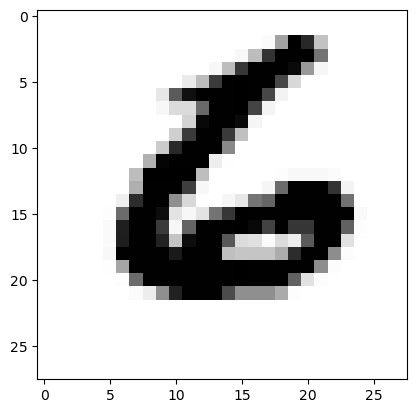

In [14]:
#plot the image
image_array = np.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')

In [15]:
# example calculations using the diagram below

# 3-layer neural net
# 3 input nodes, 3 hidden nodes, 3 output nodes


<div>
    <img src="https://i.imgur.com/Fvj7t8A.png" width="400"/>
</div>

we encode the weights into matrices.
the weights between the input/hidden layer in the above graph are encoded in the following way


In [16]:
'''
             [w_1,1, w_2,1, w_3,1]
weights_ih = [w_1,2, w_2,2, w_3,2]
             [w_1,3, w_2,3, w_3,3]      
eg

the weights between the input/hidden layer in the above graph are:

[w_1,1 = 0.9,  w_2,1 = 0.3, w_3,1 = 0.4]
[w_1,2 = 0.2,  w_2,2 = 0.8, w_3,2 = 0.2]
[w_1,3 = 0.1,  w_2,3 = 0.5, w_3,3 = 0.6]

which is represented in the code below, along with the inputs/weights_ho
(note: not all of the weights are shown in the diagram)
'''

'\n             [w_1,1, w_2,1, w_3,1]\nweights_ih = [w_1,2, w_2,2, w_3,2]\n             [w_1,3, w_2,3, w_3,3]      \neg\n\nthe weights between the input/hidden layer in the above graph are:\n\n[w_1,1 = 0.9,  w_2,1 = 0.3, w_3,1 = 0.4]\n[w_1,2 = 0.2,  w_2,2 = 0.8, w_3,2 = 0.2]\n[w_1,3 = 0.1,  w_2,3 = 0.5, w_3,3 = 0.6]\n\nwhich is represented in the code below, along with the inputs/weights_ho\n(note: not all of the weights are shown in the diagram)\n'

In [17]:
inputs = np.array([[0.9], [0.1], [0.8]])
weights_ih = np.array([[0.9, 0.3, 0.4], [0.2, 0.8, 0.2], [0.1, 0.5, 0.6]])
weights_ho = np.array([[0.3, 0.7, 0.5], [0.6, 0.5, 0.2], [0.8, 0.1, 0.9]])

In [18]:
# hidden layer input calculatiom
hidden_inputs = np.dot(weights_ih,inputs)

<div>
    <img src="https://i.imgur.com/6E4M5kK.png" width="400"/>
</div>


In [19]:
hidden_inputs

array([[1.16],
       [0.42],
       [0.62]])

<div>
    <img src="https://i.imgur.com/SaFSRNZ.png" width="400"/>
</div>

In [20]:
# calculating hidden_output

In [21]:
activation_function = lambda x: scipy.special.expit(x)

In [22]:
hidden_outputs = activation_function(hidden_inputs)

In [23]:
hidden_outputs

array([[0.76133271],
       [0.60348325],
       [0.65021855]])

<div>
    <img src="https://i.imgur.com/UvfNuFy.png" width="400"/>
</div>

In [24]:
# calculating the output layer inputs

In [25]:
output_layer_inputs = np.dot(weights_ho,hidden_outputs )

In [26]:
output_layer_inputs

array([[0.97594736],
       [0.88858496],
       [1.25461119]])

In [27]:
# calculating the output layers output
output_layer_outputs = activation_function(output_layer_inputs)
output_layer_outputs

array([[0.72630335],
       [0.70859807],
       [0.77809706]])

<div>
    <img src="https://i.imgur.com/h9ifRY5.png" width="400"/>
</div>

In [28]:
# using the multivariate chain rule, we obtain the gradient descent algorithms
# we dropped the constant 2 term

In [29]:
learning_rate = 0.1

In [30]:
def update_who(who, node_errors, final_outputs, hidden_outputs):
    who += learning_rate * np.dot((node_errors * final_outputs * (1.0 - final_outputs)), np.transpose(hidden_outputs))
    return who

In [31]:
def update_wih(hidden_errors, hidden_outputs, inputs, wih):
    wih += learning_rate * np.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), np.transpose(inputs))
    return wih

 let's consider a simpler neural network to see how gradient descent is used to update the weight who_11.
 first we will need to see how to calculate the error terms, which are node_errors and hidden_errors.
 we will only need the node_errors term for our example, but we also show how to obtain hidden_errors for updating wih.
 the node_errors and hidden_errors terms are used to insert into the gradient descent algorithms for updating who and wih.

<div>
    <img src="https://i.imgur.com/2iCQMhS.png" width="500"/>
</div>

 node_errors is calculated as (target - actual). this is calculating the term that appears in
 the gradient descent algorithm for updating the weights who. 
 note: this is distinct from calculating the loss, we are merely getting the term that appears in the gradient descent algorithm for who. 
in this example the calculation has already been done for us


In [32]:
node_errors = np.array([[0.8], [0.5]])

In [33]:
# to calculate the hidden_errors term that appears in the gradient descent algorithm
# for wih we do what is seen below
# first we have to obtain the who matrix which is:
who = np.array([[2.0/(2.0+3.0), 3.0/(3.0+2.0)], [1.0/(1.0+4.0), 4.0/(4.0+1.0)]])

<div>
    <img src="https://i.imgur.com/0lObJPw.png" width="400"/>
</div>


In [34]:
# next we tranpose the who matrix and multiply it by the node errors
hidden_errors = np.dot(who.T, node_errors)

In [35]:
# these are the term that appears in the gradient descent algorithm for calculating wih
hidden_errors

array([[0.42],
       [0.88]])

in this example we now have the node_error and hidden_error to insert into the gradient descent algorithms.
the actual code drops the denominator/normalization terms that appear in the who matrix, whereas the handwritten example above includes it. from henceforth we will also drop the normalization. 
now that we have node_errors let's the updated weight who_11, which is currently equal to 2.0

In [36]:
# the relevant node error for who_1,1 is 0.8
node_error = 0.8

 before we move further we will review some background material: the book's derivation of the gradient descent algorithm is included below:

<div>
    <img src="https://i.imgur.com/bDAuYGs.png" width="400"/>
</div>


 putting it all together with the learning rate (where we drop the constant term 2), we have:

<div>
    <img src="https://i.imgur.com/37P0suW.png" width="400"/>
</div>


In [37]:
# the old weight are adjusted by the negative of the error's slope
# we want to decrease the new weight if we have a positive slope
# and increase it if we have a negative slope
# also note dE/dwjk has a negative sign
# there is a distinct negative sign in front of the learning rate
# these two negatives signs cancel each other out and do not appear in
# the gradient descent algorithms

In [38]:
node_errors = np.array([[0.8], [0.5]])
learning_rate = 0.1
who = np.array([[2.0, 3.0], [1.0, 4.0]])
hidden_outputs = np.array([[0.4], [0.5]])
final_inputs = np.dot(who, hidden_outputs)
final_outputs = activation_function(final_inputs).reshape(2,1)

In [39]:
node_errors

array([[0.8],
       [0.5]])

In [40]:
final_outputs 

array([[0.90887704],
       [0.9168273 ]])

In [41]:
final_outputs * (1-final_outputs)

array([[0.08281957],
       [0.076255  ]])

In [42]:
who += learning_rate * np.dot((node_errors * final_outputs * (1.0 - final_outputs)), np.transpose(hidden_outputs))

In [43]:
# our updated who_11 weight is below
who[0][0]

2.002650226143704

In [44]:
# the rest of the who weight updates
who

array([[2.00265023, 3.00331278],
       [1.0015251 , 4.00190637]])